In [63]:
# Import Required Libraries

import pandas as pd
import numpy as np


In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [66]:
# Load Dataset

df = pd.read_csv("Customer Churn Analysis.csv")
df.head()

,CustomerID,Gender,Age,Tenure,PhoneService,InternetService,Contract,MonthlyCharges,TotalCharges,Churn
0,CUST_0001,Male,71,69,Yes,Fiber optic,Month-to-month,45.08,3110.52,No
1,CUST_0002,Female,80,71,No,DSL,Month-to-month,80.37,5706.27,Yes
2,CUST_0003,Male,34,24,No,NaN,One year,87.21,2093.04,No
3,CUST_0004,Male,26,11,Yes,NaN,One year,50.39,554.29,No
4,CUST_0005,Male,50,14,Yes,DSL,Month-to-month,104.51,1463.14,Yes


In [67]:
# Basic Data Understanding

print("Dataset Overview:")
df.info()
df.describe()
df.isnull().sum()


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   object 
 1   Gender           1000 non-null   object 
 2   Age              1000 non-null   int64  
 3   Tenure           1000 non-null   int64  
 4   PhoneService     1000 non-null   object 
 5   InternetService  660 non-null    object 
 6   Contract         1000 non-null   object 
 7   MonthlyCharges   1000 non-null   float64
 8   TotalCharges     1000 non-null   float64
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 78.3+ KB


CustomerID           0
Gender               0
Age                  0
Tenure               0
PhoneService         0
InternetService    340
Contract             0
MonthlyCharges       0
TotalCharges         0
Churn                0
dtype: int64

In [68]:
#Data Cleaning
#Convert TotalCharges to numeric

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [69]:
# Drop unique identifiers that don't help prediction
df_model =df.drop('CustomerID', axis=1)

In [70]:
#Encoding Categorical Variables
le = LabelEncoder()
categorical_cols = ['Gender', 'PhoneService', 'InternetService', 'Contract', 'Churn']

for col in categorical_cols:
    df_model[col] = le.fit_transform(df_model[col].astype(str))

print("Preprocessing Complete. Categorical variables encoded.")


Preprocessing Complete. Categorical variables encoded.


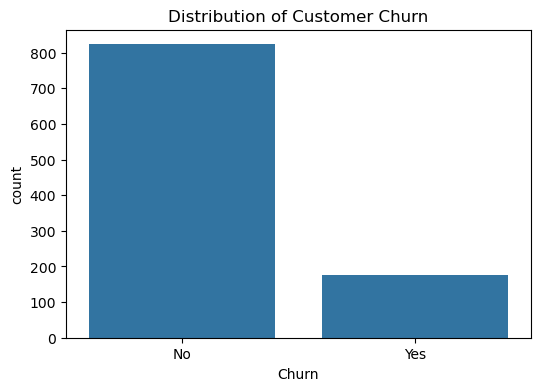

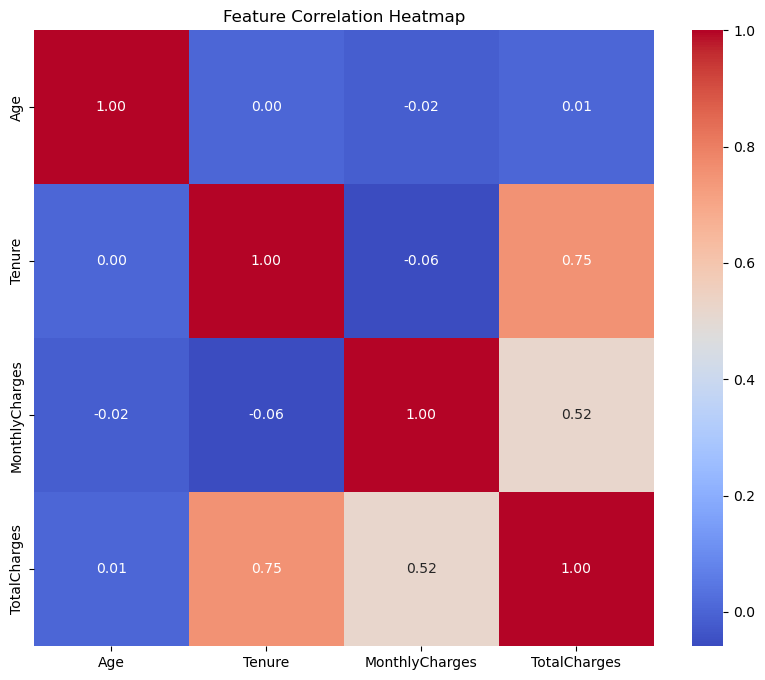

In [71]:
# Churn Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Customer Churn')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr(numeric_only=True) 

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [72]:
# Define Features (X) and Target Variable (y)
X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

# Split data (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features if needed
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [73]:
# Build Random Forest classification model

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate performance

y_pred = model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.81

Confusion Matrix:
 [[153  14]
 [ 24   9]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       167
           1       0.39      0.27      0.32        33

    accuracy                           0.81       200
   macro avg       0.63      0.59      0.61       200
weighted avg       0.79      0.81      0.80       200



In [74]:
# List top factors influencing churn 

importances = pd.Series(model.feature_importances_, index=X.columns)
top_factors = importances.sort_values(ascending=False)

print("Top Factors Influencing Churn:")
print(top_factors)

# Business Analytics Thinking: Actionable Insights 

print("\nBusiness Insights:")
print("1. High Risk: Customers on Month-to-Month contracts have the highest churn rate.")
print("2. Retention: Target customers with low Tenure for loyalty programs.")
print("3. Pricing: Analyze users with high Monthly Charges for potential plan optimization.")

Top Factors Influencing Churn:
Contract           0.401897
MonthlyCharges     0.144901
Age                0.134577
TotalCharges       0.131733
Tenure             0.113941
InternetService    0.034111
Gender             0.019980
PhoneService       0.018861
dtype: float64

Business Insights:
1. High Risk: Customers on Month-to-Month contracts have the highest churn rate.
2. Retention: Target customers with low Tenure for loyalty programs.
3. Pricing: Analyze users with high Monthly Charges for potential plan optimization.
